In [2]:
import logging

logger = logging.getLogger()
logger.disabled = True

import numpy as np
from tqdm.auto import tqdm

from agent import HandcraftedAgent


capacity = {"episodic": 16, "episodic_agent": 16, "semantic": 16, "short": 1}


config = {
    "question_prob": 1.0,
    "seed": 42,
    "terminates_at": 99,
}

results = {}

for mm_policy in ["random", "generalize"]:
    for qa_policy in ["random", "episodic_semantic"]:
        for explore_policy in ["random", "avoid_walls"]:
            for pretrain_semantic in [False, True]:
                key = (
                    mm_policy,
                    qa_policy,
                    explore_policy,
                    pretrain_semantic,
                )
                if key not in results:
                    results[key] = []
                print(key)

                for seed in tqdm([0, 1, 2, 3, 4]):
                    config["seed"] = seed

                    agent = HandcraftedAgent(
                        env_str="room_env:RoomEnv-v2",
                        env_config=config,
                        mm_policy=mm_policy,
                        qa_policy=qa_policy,
                        explore_policy=explore_policy,
                        num_samples_for_results=10,
                        capacity=capacity,
                        pretrain_semantic=pretrain_semantic,
                    )
                    agent.test()
                    to_append = (np.mean(agent.scores), np.std(agent.scores))
                    # print(to_append)
                    results[key].append(to_append)

('random', 'random', 'random', False)


100%|██████████| 5/5 [00:01<00:00,  4.94it/s]


('random', 'random', 'random', True)


100%|██████████| 5/5 [00:01<00:00,  4.88it/s]


('random', 'random', 'avoid_walls', False)


  0%|          | 0/5 [00:00<?, ?it/s]


IndexError: list index out of range

In [2]:
print(
    f"{'memory mgmt':<20}{'qa':<20}{'explore':<20}{'pretrain_semantic':<20}{'mean':<10}{'std':<10}"
)
print(f"-" * 110)
for key, val in results.items():
    print(
        f"{str(key[0]):<20}{str(key[1]):<20}{str(key[2]):<20}{str(key[3]):<20}{round(np.mean([v[0] for v in val]), 2):<10}{round(np.std([v[0] for v in val]), 2):<10}"
    )

memory mgmt         qa                  explore             pretrain_semantic   mean      std       
--------------------------------------------------------------------------------------------------------------
random              random              random              False               26.8      1.75      
random              random              random              True                31.48     0.84      
random              random              avoid_walls         False               45.52     2.76      
random              random              avoid_walls         True                46.36     1.36      
random              episodic_semantic   random              False               63.2      2.33      
random              episodic_semantic   random              True                67.56     3.27      
random              episodic_semantic   avoid_walls         False               73.08     1.27      
random              episodic_semantic   avoid_walls         True                7

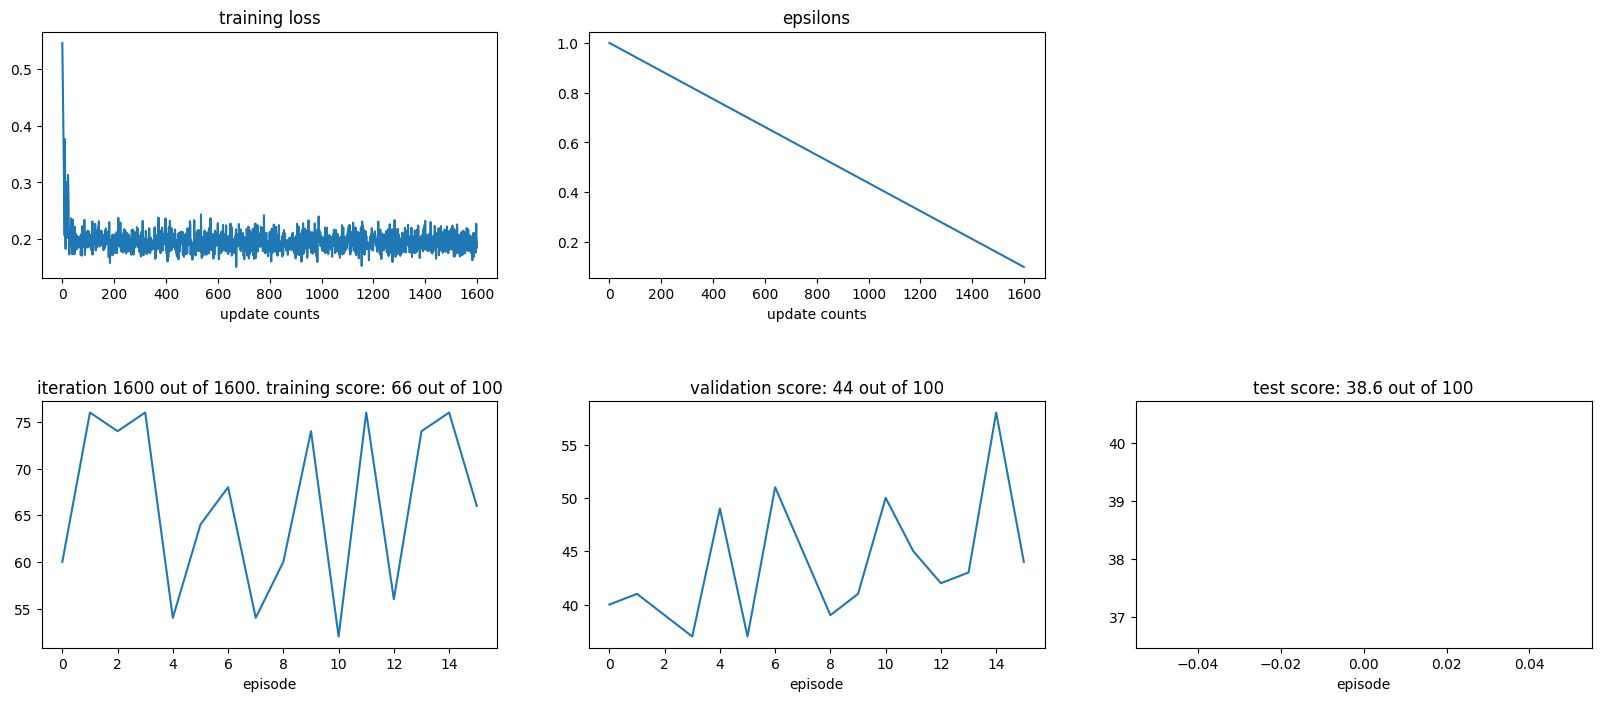

In [1]:
import logging

logger = logging.getLogger()
logger.disabled = True

from agent.dqn import DQNExploreAgent

for pretrain_semantic in [False, True]:
    for test_seed in [0, 1, 2, 3, 4]:
        # parameters
        all_params = {
            "env_str": "room_env:RoomEnv-v2",
            "max_epsilon": 1.0,
            "min_epsilon": 0.1,
            "epsilon_decay_until": 100 * 16,
            "gamma": 0.65,
            "capacity": {
                "episodic": 16,
                "episodic_agent": 16,
                "semantic": 16,
                "short": 1,
            },
            "nn_params": {
                "hidden_size": 64,
                "num_layers": 2,
                "embedding_dim": 32,
                "v1_params": None,
                "v2_params": {},
                "memory_of_interest": [
                    "episodic",
                    "episodic_agent",
                    "semantic",
                    "short",
                ],
            },
            "num_iterations": 100 * 16,
            "replay_buffer_size": 1024 * 100,
            "warm_start": 1024 * 100,
            "batch_size": 1024,
            "target_update_rate": 10,
            "pretrain_semantic": pretrain_semantic,
            "run_validation": True,
            "run_test": True,
            "num_samples_for_results": 10,
            "train_seed": test_seed + 5,
            "plotting_interval": 10,
            "device": "cpu",
            "test_seed": test_seed,
            "mm_policy": "generalize",
            "qa_policy": "episodic_semantic",
            "env_config": {
                "question_prob": 1.0,
                "terminates_at": 99,
                "room_size": "dev",
            },
            "ddqn": True,
            "dueling_dqn": True,
        }
agent = DQNExploreAgent(**all_params)
agent.train()

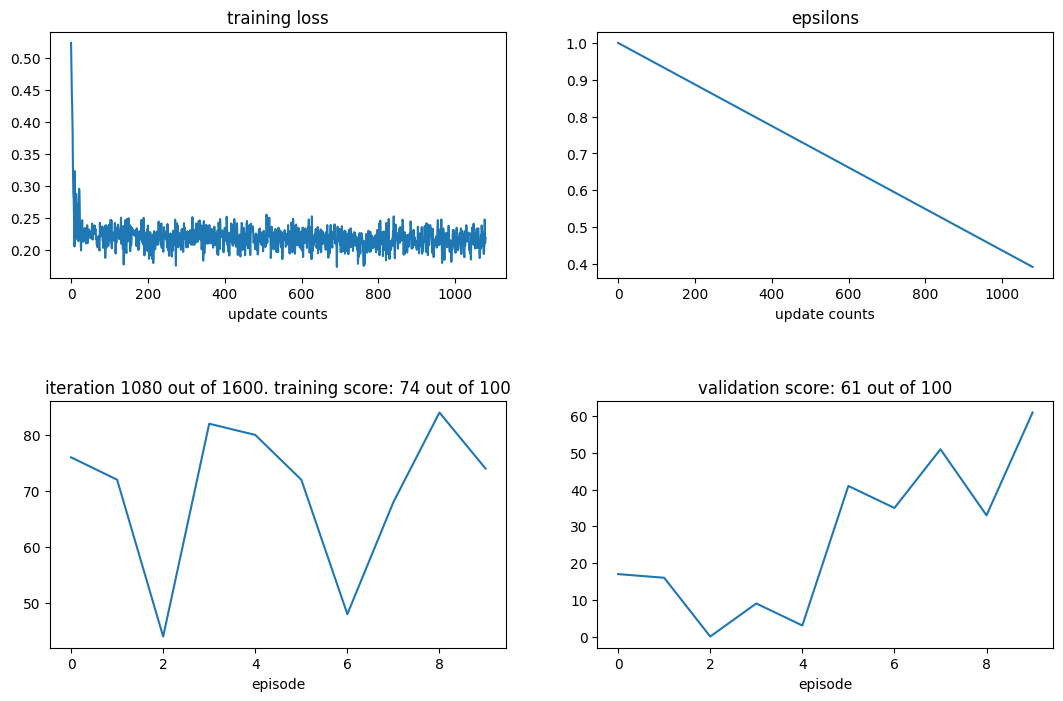

 68%|██████▊   | 1082/1600 [1:14:58<35:53,  4.16s/it]

Unexpected exception formatting exception. Falling back to standard exception



Traceback (most recent call last):
  File "/home/tk/.virtualenvs/human-memory/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_256959/4166539343.py", line 48, in <module>
    agent.train()
  File "/home/tk/repos/explicit-memory-private/RoomEnv2/agent/dqn/dqn_explore.py", line 264, in train
    loss = self.update_model()
  File "/home/tk/repos/explicit-memory-private/RoomEnv2/agent/dqn/dqn.py", line 219, in update_model
  File "/home/tk/.virtualenvs/human-memory/lib/python3.10/site-packages/torch/_tensor.py", line 487, in backward
    torch.autograd.backward(
  File "/home/tk/.virtualenvs/human-memory/lib/python3.10/site-packages/torch/autograd/__init__.py", line 200, in backward
    Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback

In [3]:
import logging

logger = logging.getLogger()
logger.disabled = True

from agent.dqn import DQNExploreAgent

all_params = {
    "env_str": "room_env:RoomEnv-v2",
    "max_epsilon": 1.0,
    "min_epsilon": 0.1,
    "epsilon_decay_until": 100 * 16,
    "gamma": 0.65,
    "capacity": {"episodic": 16, "episodic_agent": 16, "semantic": 16, "short": 1},
    "nn_params": {
        "hidden_size": 64,
        "num_layers": 2,
        "embedding_dim": 32,
        "v1_params": None,
        "v2_params": {},
        "memory_of_interest": ["episodic", "episodic_agent", "semantic", "short"],
    },
    "num_iterations": 100 * 16,
    "replay_buffer_size": 1024 * 100,
    "warm_start": 1024 * 100,
    "batch_size": 1024,
    "target_update_rate": 10,
    "pretrain_semantic": False,
    "run_validation": True,
    "run_test": True,
    "num_samples_for_results": 10,
    "train_seed": 5,
    "plotting_interval": 10,
    "device": "cpu",
    "test_seed": 0,
    "mm_policy": "generalize",
    "qa_policy": "episodic_semantic",
    "env_config": {
        "question_prob": 1.0,
        "terminates_at": 99,
        "room_size": "dev",
    },
    "ddqn": True,
    "dueling_dqn": True,
}

agent = DQNExploreAgent(**all_params)
agent.train()

In [ ]:
from glob import glob
from explicit_memory.utils import read_yaml

results = {"pretrain": [], "scratch": []}
for foo in glob("./training_results/*/*train.yaml"):
    bar = read_yaml(foo)
    # print(foo, bar["test_seed"], bar["pretrain_semantic"])

    foo_ = foo.replace("train.yaml", "results.yaml")

    bar_ = read_yaml(foo_)
    if bar["pretrain_semantic"]:
        results["pretrain"].append(bar_["test_score"])
    else:
        results["scratch"].append(bar_["test_score"])


foo = [foo["mean"] for foo in results["scratch"]]
print(f"{'scratch':<15}{round(np.mean(foo), 2)}  +-  {round(np.std(foo), 2)}")

foo = [foo["mean"] for foo in results["pretrain"]]
print(f"{'pretrain':<15}{round(np.mean(foo), 2)}  +-  {round(np.std(foo), 2)}")